In [2]:
import lightkurve as lk

In [3]:
lcfs = lk.search_lightcurvefile('Kepler-8b', mission='Kepler').download_all()

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [4]:
lcfs

LightCurveFileCollection of 18 objects:
	KIC 6922244 (18 KeplerLightCurveFiles) Quarters: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17

In [5]:
lcfs.PDCSAP_FLUX

LightCurveCollection of 18 objects:
	KIC 6922244 (18 KeplerLightCurves) Quarters: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17

In [6]:
stitched_lc = lcfs.PDCSAP_FLUX.stitch()
stitched_lc

KeplerLightCurve(ID: 6922244)

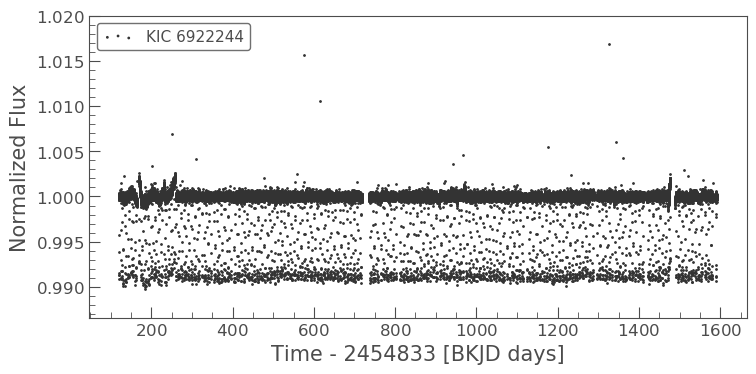

In [7]:
stitched_lc.scatter();

In [8]:
def my_custom_corrector_func(lc):
    corrected_lc = lc.normalize().flatten(window_length=401)
    return corrected_lc

In [9]:
stitched_lc = lcfs.PDCSAP_FLUX.stitch(corrector_func=my_custom_corrector_func)

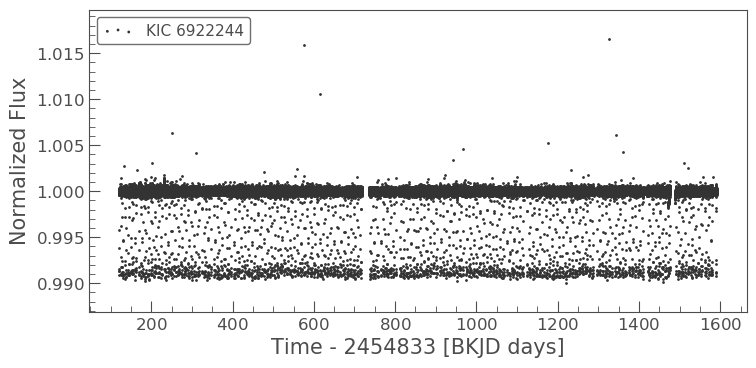

In [10]:
stitched_lc.scatter()

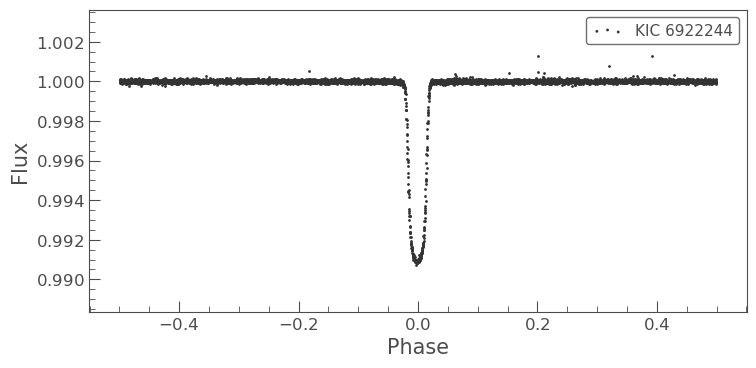

In [11]:
stitched_lc.fold(period=3.52254, t0=1.35).bin().scatter();

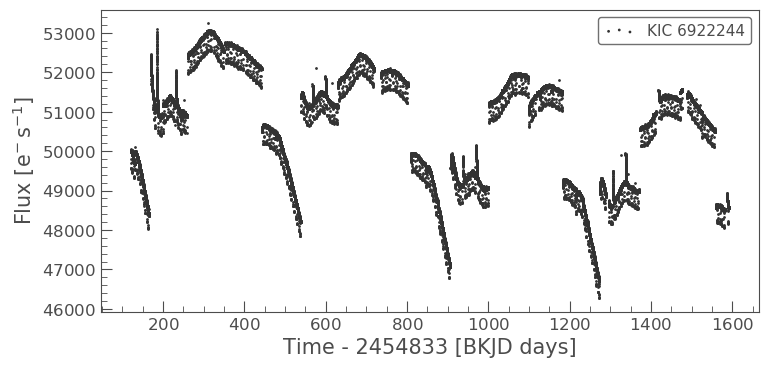

In [13]:
lcfs.SAP_FLUX.stitch(corrector_func=lambda lc:lc).scatter(normalize=False)